In [50]:
import cv2
import torch
import yolos
import numpy as np
import matplotlib.pyplot as plt

In [2]:
states = torch.load("/yolosProject/outputs/params.pt")

In [3]:
net = yolos.models.YoloV1(C=3)

/aios/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/aios/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 528M/528M [03:03<00:00, 3.02MB/s]


In [4]:
net.load_state_dict(states["net"])

<All keys matched successfully>

In [102]:
dataset = yolos.datasets.FruitsImageDataset("/yolosProject/database/Fruits/test", yolos.datasets.Compose([yolos.datasets.Resize(size=(224, 224)), yolos.datasets.ToTensor()]), C=3)

In [104]:
X, T = dataset[0]

In [114]:
yolos.DecoderBBox(yolos.utils.DetectBBox(T, 0.2, 7, 2, 3).reshape(-1, 2, 9)[..., 0, :], 300, 229)

tensor([[ 55., -10., 148.,  79.,   0.],
        [ 49.,  89., 158., 181.,   0.],
        [114.,  28., 218., 132.,   0.],
        [193.,  61., 302., 164.,   0.],
        [208., 139., 298., 229.,   0.]])

In [72]:
output = net(torch.FloatTensor(X)).detach()

In [73]:
output_ = yolos.utils.DetectProcessing(output.squeeze(0), 0.2, 0.5, 1, 1, 7, 2, 3)

In [79]:
yolos.utils.DecoderBBox(output_[0], 300, 229).long()

tensor([[101,  35, 200, 128,   0]])

In [80]:
yolos.utils.DecoderBBox(T_[0], 300, 229).long()

tensor([[ 55, -10, 148,  79,   0],
        [114,  28, 218, 132,   0]])

In [82]:
images = (X[0].permute(1, 2, 0) * 255).long().numpy().astype(np.uint8)
# images = images[..., ::-1].copy()

In [83]:
images.shape

(224, 224, 3)

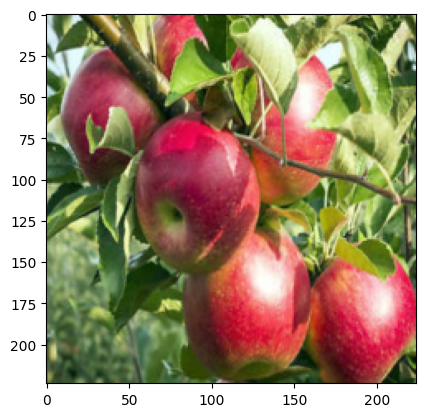

In [84]:
plt.imshow(images)

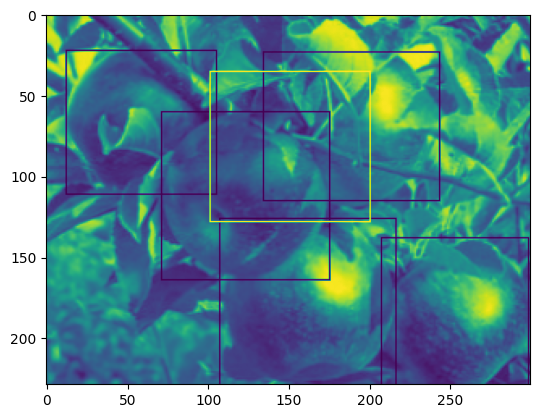

In [98]:
images = (X[0].permute(1, 2, 0) * 255).long().numpy().astype(np.uint8)
images = cv2.resize(images, (300, 229))
images = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
images = cv2.rectangle(images,  (71, 60), (175, 164), [0, 255, 0], 1)
images = cv2.rectangle(images,  (12, 22), (105, 111), [0, 255, 0], 1)
images = cv2.rectangle(images,  (134, 23), (243, 115), [0, 255, 0], 1)
images = cv2.rectangle(images,  (107, 126), (216, 229), [0, 255, 0], 1)
images = cv2.rectangle(images,  (207, 138), (298, 229), [0, 255, 0], 1)
images = cv2.rectangle(images,  (101, 35), (200, 128), [255, 0, 0], 1)
plt.imshow(images)